# Econometrics Problem Set 1

## In this problem set we are going to look at the realtionship between violence and unemployment rates across US states. Firstly, I am going to import all of the different libraries that I need.

In [26]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Next is to load the data in to a dataframe using pandas and take a look at the data that we have.

In [27]:
file_path = r"C:\Users\tomdo\Desktop\Stats\econometrics\problemset1_data.xls"
df = pd.read_excel(file_path)
df.head()

,State,Unemployment,Violence
0,Alabama,7.2,383.7
1,Alaska,7.0,635.3
2,Arizona,7.7,413.6
3,Arkansas,7.2,503.5
4,California,8.9,439.6


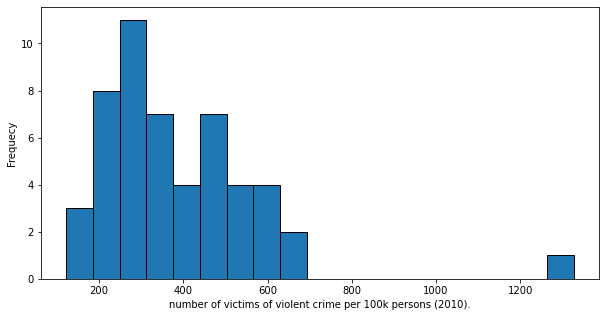

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(df["Violence"], bins=19, edgecolor="black")

plt.xlabel("number of victims of violent crime per 100k persons (2010).")
plt.ylabel("Frequecy")

plt.show()

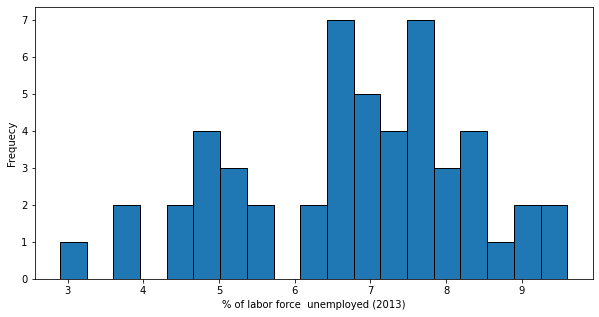

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(df["Unemployment"], bins=19, edgecolor="black")

plt.xlabel("% of labor force  unemployed (2013)")
plt.ylabel("Frequecy")

plt.show()

In [30]:
df[df["Violence"] == df["Violence"].max()]

,State,Unemployment,Violence
8,District of Columbia,8.5,1326.8


In [31]:
df.describe()

,Unemployment,Violence
count,51.000000,51.000000
mean,6.764706,385.280392
std,1.539328,195.113742
min,2.900000,122.100000
25%,5.550000,260.850000
50%,6.900000,323.700000
75%,7.800000,475.150000
max,9.600000,1326.800000


Text(0, 0.5, 'Violence')

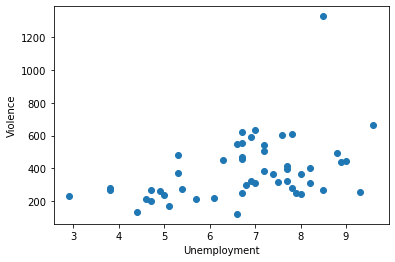

In [54]:
plt.scatter(df["Unemployment"], df["Violence"])
plt.xlabel("Unemployment")
plt.ylabel("Violence")

In [62]:
correlation = np.corrcoef(df["Violence"], df["Unemployment"])[0][1]
correlation
print(f"The correlation coefficient between Violence and Unemployment is {correlation}")

The correlation coefficient between Violence and Unemployment is 0.4208817510627497


In [64]:
c, p = scipy.stats.pearsonr(df["Violence"], df["Unemployment"])
print(f"The correlation coefficient between Violence and Unemployment is {c}. \nThe p value is {p}")

The correlation coefficient between Violence and Unemployment is 0.4208817510627495. 
The p value is 0.002102099087772618


In [ ]:
#There is some positive correlation between violence and unemployment across the different states in the US 

In [65]:
x, y = df["Unemployment"], df["Violence"]

In [66]:
x = sm.add_constant(x)

C:\Users\tomdo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
model = sm.OLS(y, x)

In [68]:
results = model.fit()

In [69]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Violence   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     10.55
Date:                Wed, 27 Sep 2023   Prob (F-statistic):            0.00210
Time:                        18:49:01   Log-Likelihood:                -335.84
No. Observations:                  51   AIC:                             675.7
Df Residuals:                      49   BIC:                             679.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.3979    113.900      0.214   

In [ ]:
"""
The results from this show that for a 1% increase in unemployment, on average there would tend to be 53 more cases
of violence per 100k people.

If the rate of unemployment was to increase by 1 standard deviation (1.5%) this would result in an increase in the 
cases of violence per 100k people by 1.5 * 53 = 82. The standard deviation in violence is 195 so the 1 sd move in 
unemployment would cause a 0.42 sd move in violence.


"""
